# Concrete compressive strength

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [10]:
df=pd.read_csv('C:/Users/HP/anaconda3/DataScience/DataScienceProjects/Concrete mixture/Concrete_Data.csv')

In [11]:
df=pd.DataFrame(data=df)

In [12]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
df.dtypes

Cement                            float64
Blast Furnace Slag                float64
Fly Ash                           float64
Water                             float64
Superplasticizer                  float64
Coarse Aggregate                  float64
Fine Aggregate                    float64
Age                                 int64
Concrete compressive strength     float64
dtype: object

In [14]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
df.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age                               0
Concrete compressive strength     0
dtype: int64

In [16]:
df.skew()

Cement                            0.509481
Blast Furnace Slag                0.800717
Fly Ash                           0.537354
Water                             0.074628
Superplasticizer                  0.907203
Coarse Aggregate                 -0.040220
Fine Aggregate                   -0.253010
Age                               3.269177
Concrete compressive strength     0.416977
dtype: float64

<AxesSubplot:ylabel='Frequency'>

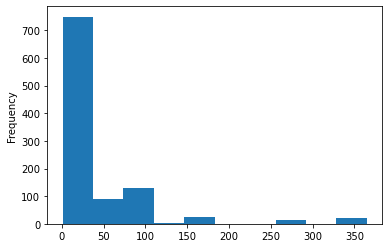

In [17]:
df['Age'].plot.hist()

In [18]:
from scipy.stats import boxcox
df['Age']=boxcox(df['Age'],0)

<AxesSubplot:ylabel='Frequency'>

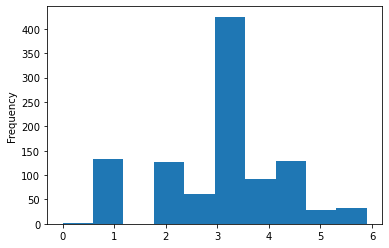

In [19]:
df['Age'].plot.hist()

In [20]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength '],
      dtype='object')

array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag'}>,
        <AxesSubplot:title={'center':'Fly Ash'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Concrete compressive strength '}>]],
      dtype=object)

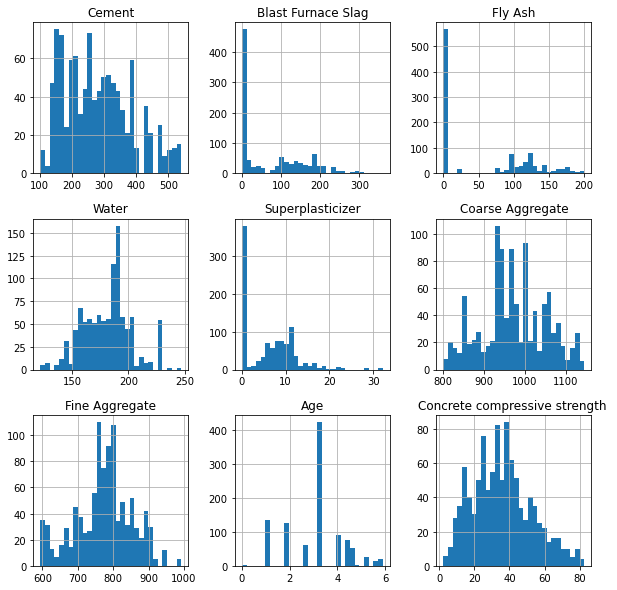

In [21]:
df.hist(bins=30, figsize=(10,10))

<AxesSubplot:xlabel='Age', ylabel='Density'>

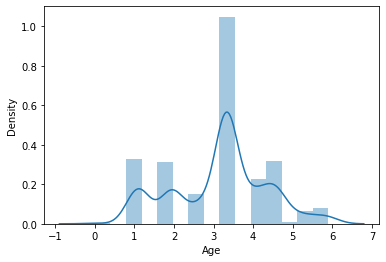

In [22]:
sns.distplot(df['Age'])

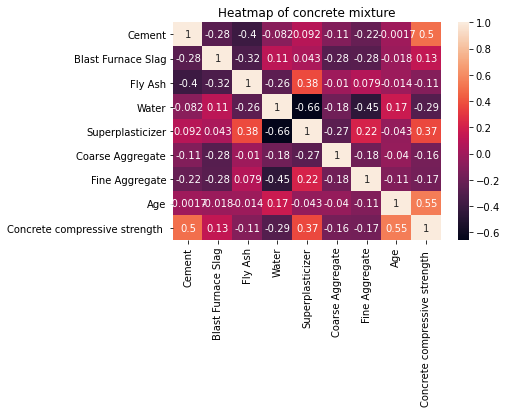

In [41]:
corr_hmap= df.corr()
sns.heatmap(corr_hmap,annot=True)
plt.title("Heatmap of concrete mixture")
plt.show()

In [43]:
df_new=df[(z<3).all(axis=1)]

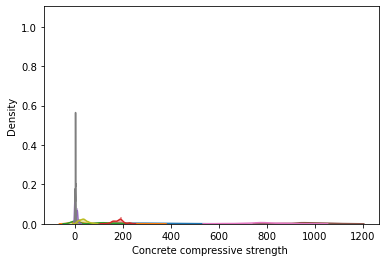

In [44]:
def distplot(df_new,var):
    for var in df.columns:
        sns.distplot(df_new[var])
distplot(df_new,df_new.columns)

Cement                               AxesSubplot(0.125,0.125;0.0731132x0.755)
Blast Furnace Slag                AxesSubplot(0.212736,0.125;0.0731132x0.755)
Fly Ash                           AxesSubplot(0.300472,0.125;0.0731132x0.755)
Water                             AxesSubplot(0.388208,0.125;0.0731132x0.755)
Superplasticizer                  AxesSubplot(0.475943,0.125;0.0731132x0.755)
Coarse Aggregate                  AxesSubplot(0.563679,0.125;0.0731132x0.755)
Fine Aggregate                    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Age                               AxesSubplot(0.739151,0.125;0.0731132x0.755)
Concrete compressive strength     AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

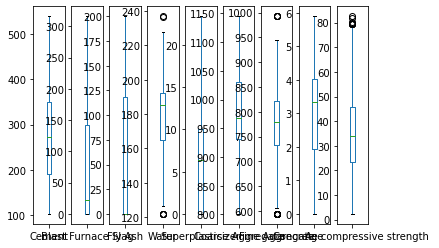

In [45]:
df_new.plot(kind='box',subplots=True)

In [47]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df_new))

In [48]:
z

array([[2.53419514, 0.85853621, 0.85591851, ..., 1.2177008 , 0.13701226,
        2.66207804],
       [2.53419514, 0.85853621, 0.85591851, ..., 1.2177008 , 0.13701226,
        1.57551243],
       [0.51727958, 0.81923211, 0.85591851, ..., 2.24472396, 2.03807384,
        0.27763683],
       ...,
       [1.27121422, 0.78273329, 0.83712171, ..., 0.08486516, 0.13701226,
        0.71708097],
       [1.16818143, 1.33963464, 0.85591851, ..., 0.19633474, 0.13701226,
        0.17259754],
       [0.17867779, 0.32473198, 0.36475414, ..., 0.14684129, 0.13701226,
        0.1948091 ]])

In [49]:
threshold=3
print(np.where(z>3))

(array([ 74,  95, 116, 137, 158], dtype=int64), array([4, 4, 4, 4, 4], dtype=int64))


In [50]:
z[74][4]

3.1623052558660825

In [51]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
lm=LinearRegression()

In [54]:
lm.fit(x_train,y_train)

LinearRegression()

In [55]:
lm.score(x_train,y_train)

0.8351992957671456

In [56]:
lm.coef_

array([ 0.14129467,  0.12476042,  0.09393302, -0.1081085 ,  0.20028125,
        0.03530508,  0.04487939,  8.73068806])

In [57]:
lm.intercept_

-96.43418952640621

In [60]:
pred=lm.predict(x_test)

In [61]:
print("Predicted compressive strength is: ",pred)
print("Actual compressive strength is: ",y_test)

Predicted compressive strength is:  [29.24454635 59.78982535 19.61939063 35.98215166 25.90121877 13.05339138
 49.01599292  6.94214    31.34463378 38.67988571 29.11831772 36.26963975
 29.51851512 17.68857383 67.67787665  9.76839487 49.70672209 31.07718065
 18.99381145 34.88981029 35.29619816 68.62812065 32.90970962 32.05358636
 31.58063446 20.44811611 13.47923808 36.78490867 43.43076905 43.49113283
 32.52407722 68.49489374 32.33104052 14.63014215 25.10300896  4.2394287
 38.59128417 17.8783203   7.30311388 35.8069944  30.85566268 40.71023975
 35.32506351 18.92432129 33.1404474  39.89618435 33.51815966 49.85220745
 38.26524266 39.64118465 38.81299517 36.85788957 32.40384709 47.15854774
 52.85047318 19.82072589 44.89115036 41.16227617 45.83613389 26.17800402
 19.37419578 43.07567189 53.44842008 18.82528134 47.17423321 30.04638415
 35.32084362 13.40891268 29.22727446 28.84951329 32.79568778 20.6879142
 73.26753493 36.01898792 26.05040922 24.43682433 21.75704345 32.79121782
 27.01877666 54.9

Higher the compressive strength,higher is the strength of building anything. 
And the quantity of the materials used in case of higher compressive strength will get you better infrastructure